In [103]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import scipy.special as sp
import scipy.stats as stats
from scipy.integrate import quad

In [100]:
from landaupy import landau

In [ ]:
print("*Using Fitting Functions*")
print("Available Functions:")

In [98]:
print("\tPoly(x,pars_) returns an polynomial of order of pars. Starts with x^0 and increments up")
def Poly(x,pars_):
    output = 0
    for i in range(len(pars_)):
        output+=(x**i)*pars_[i]
    return output
print("\tPoly3(x,p0_,p1_,p2_,p3_) returns a 3rd order polynomial ")
def Poly3(x,p0_,p1_,p2_,p3_):
    return p0_+p1_*x+p2_*x*x+p3_*x*x*x
print("\tGaus(x,a_,m_,s_) returns a gaus with amplitude a_, mean m_, and sigma s_")
def Gaus(x, a_, m_, s_):
    return a_*np.exp(-(x-m_)*(x-m_)/(2*s_*s_))
print("\tGaus2(x, a1_, m1_, s1_, a2_, m2_, s2_) returns two gaussians")
def Gaus2(x, a1_, m1_, s1_, a2_, m2_, s2_):
    return Gaus(x,a1_,m1_,s1_)+Gaus(x,a2_,m2_,s2_)
print("\tGaus_bk_const(x,a_,m_,s_,c_) returns a gaus with constant background c_")
def Gaus_bk_const(x,a1_,m1_,s1_,c_):
    return Gaus(x,a1_,m1_,s1_)+c_
print("\tGaus_bk_lin(x,a_,m_,s_,slope_,c_) returns a gaus with linear background")
def Gaus_bk_lin(x,a1_,m1_,s1_,slope_,c_):
    return Gaus(x,a1_,m1_,s1_)+Poly(x,[c_,slope_])
print("\tGaus_bk_quad(x,a_,m_,s_,sq0_,sq1_,sq2_) returns a gaus with quadratic background. # on sq is power of x")
def Gaus_bk_quad(x,a1_,m1_,s1_,sq0_,sq1_,sq2_):
    return Gaus(x,a1_,m1_,s1_)+Poly(x,[sq0_,sq1_,sq2_])
print("\tNeg_Bi_Poisson(x,r_,lambda_,a_) returns a Negative binomial Poisson Function")
def Neg_Bi_Poisson_n(x,r_,lambda_,a_):
    return a_*np.power(lambda_,x)*sp.gamma(r_+x)/(sp.factorial(x)*sp.gamma(r_)*(np.power(r_+lambda_,x))*(1+(lambda_/r_))**r_)
def Neg_Bi_Poisson(x,r_,lambda_,a_):
    output = [0 for i in range(len(x))]
    do = True
    for i in range(len(x)):
        if do:
            if Neg_Bi_Poisson_n(x[i],r_,lambda_,a_)>10**-40:
                output[i] = Neg_Bi_Poisson_n(x[i],r_,lambda_,a_)
            else:
                if Neg_Bi_Poisson_n(x[i-1],r_,lambda_,a_) > Neg_Bi_Poisson_n(x[i],r_,lambda_,a_):
                    do = False
        else:
            output[i] = 0.0
    return output
print("\tNeg_Bi_Poisson2(x,r_,lambda_,a_,r2_,lambda2_,a2_) returns a sum of two Negative binomial Poisson Functions")
def Neg_Bi_Poisson2(x,r_,lambda_,a_,r2_,lambda2_,a2_):
    return Neg_Bi_Poisson(x,r_,lambda_,a_) + Neg_Bi_Poisson(x,r2_,lambda2_,a2_)
#for i in range(200):
#    try:
#        cont_x = [j+1+i for j in range(60+i)]
#        name="fit at"+str(60+i)
#        plt.scatter(cont_x,Neg_Bi_Poisson(cont_x,11.0,80.0,400000.),label=name)
#    except RuntimeWarning:
#        print("Runtime warning at",60+i)
#plt.show()

	Poly(x,pars_) returns an polynomial of order of pars. Starts with x^0 and increments up
	Poly3(x,p0_,p1_,p2_,p3_) returns a 3rd order polynomial 
	Gaus(x,a_,m_,s_) returns a gaus with amplitude a_, mean m_, and sigma s_
	Gaus2(x, a1_, m1_, s1_, a2_, m2_, s2_) returns two gaussians
	Gaus_bk_const(x,a_,m_,s_,c_) returns a gaus with constant background c_
	Gaus_bk_lin(x,a_,m_,s_,slope_,c_) returns a gaus with linear background
	Gaus_bk_quad(x,a_,m_,s_,sq0_,sq1_,sq2_) returns a gaus with quadratic background. # on sq is power of x
	Neg_Bi_Poisson(x,r_,lambda_,a_) returns a Negative binomial Poisson Function
	Neg_Bi_Poisson2(x,r_,lambda_,a_,r2_,lambda2_,a2_) returns a sum of two Negative binomial Poisson Functions


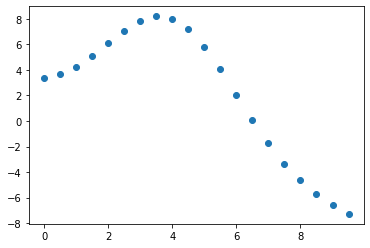

In [16]:
#x = np.array([i*0.5 for i in range(20)])
#y= Gaus_bk_lin(x,10,4,2,-1,2)
#plt.scatter(x,y)
#plt.show()

In [26]:
print("\tSuper_Gaus(x,a_,m_,s_,p_) returns a Super Gaussian that can have flatness modified with p_")
def Super_Gaus(x,a_,m_,s_,p_):
    return a_*np.exp(-(np.abs(x-m_)/(np.sqrt(2)*s_))**p_)

print("\tSuper_Gaus_Bound(a_,m_,s_,p_,frac_) returns an array of the x values where the Super Gaus hits a given fraction of its max")
def Super_Gaus_Bound(a_,m_,s_,p_,frac_):
    bound_top= np.sqrt(2)*s_*(-np.log(frac_))**(1/p_) + m_
    bound_low= m_ - np.sqrt(2)*s_*(-np.log(frac_))**(1/p_)
    return [bound_low,bound_top]
#def Erf_Gaus(x,)

	Super_Gaus(x,a_,m_,s_,p_) returns a Super Gaussian that can have flatness modified with p_
	Super_Gaus_Bound(a_,m_,s_,p_,frac_) returns an array of the x values where the Super Gaus hits a given fraction of its max


In [5]:
print("\tPoisson(x,a1_,l1_) returns a poisson")
def Poisson(x,a_,l_):
    return a_*stats.poisson.pmf(x,l_)
 
print("\tPoisson_2(x,a1_,l1_,a2_,l2_) returns a double poisson")
def Poisson_2(x,a1_,l1_,a2_,l2_):
    return Poisson(x,a1_,l1_)+Poisson(x,a2_,l2_)

def Gaus_Poisson(x,a1_, m_, s_,a2_,l_ ):
    return Gaus(x,a1_,m_,s_) + Poisson(x,a2_,l_)

	Poisson(x,a1_,l1_) returns a poisson
	Poisson_2(x,a1_,l1_,a2_,l2_) returns a double poisson


In [18]:
print("enjoy using fitting functions\n")

enjoy using fitting functions



	def skew_norm(x_,skew_,loc_,scale_,norm_) skewed normal distribution


/var/folders/9h/zwsh0vf94zxdp3tw1qp_dcjw0000gn/T/ipykernel_29750/127158241.py:27: RuntimeWarning: overflow encountered in double_scalars
  return a_*np.power(lambda_,x)*sp.gamma(r_+x)/(sp.factorial(x)*sp.gamma(r_)*(np.power(r_+lambda_,x))*(1+(lambda_/r_))**r_)


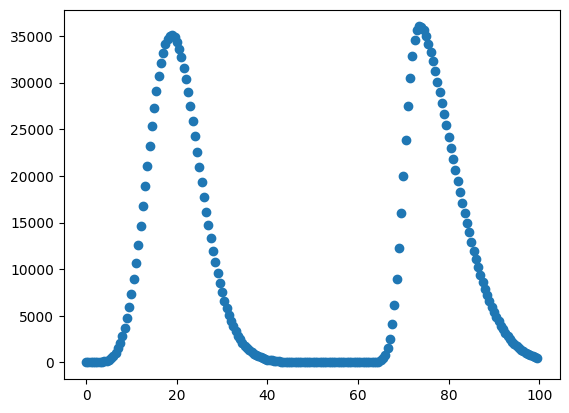

In [97]:
print("\tdef skew_norm(x_,skew_,loc_,scale_,norm_) skewed normal distribution")
def skew_norm(x_,skew_,loc_,scale_,norm_):
    return norm_*stats.skewnorm.pdf(x_,skew_,loc=loc_,scale=scale_)

def skew_norm_neg_bi_poisson(x_,skew_,loc_,scale_,norm_,r_,lambda_,a_):
    return skew_norm(x_,skew_,loc_,scale_,norm_) + Neg_Bi_Poisson(x_,r_,lambda_,a_)
    #for i in range(len(x_)):
    #    if x_[i]<80:
    #        output[i] = skew_norm(x_[i],skew_,loc_,scale_,norm_) + Neg_Bi_Poisson_n(x_[i],r_,lambda_,a_)
    #    else:
    #        output[i] = skew_norm(x_[i],skew_,loc_,scale_,norm_)
    #return output

#cont_x = [i/2 for i in range(200)]
#plt.scatter(cont_x,skew_norm_neg_bi_poisson(cont_x,5,70,10,500000,30,20,500000))
#plt.show()



ValueError: x and y must be the same size

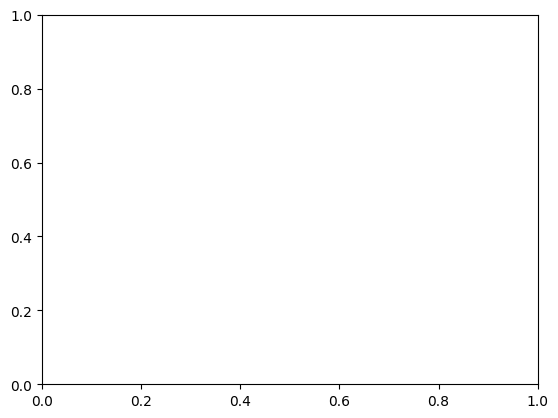

In [102]:
#print(len(x))
#plt.scatter(x,pdf)

In [104]:
def landau_integrand(t_,x_,mu_,c_):
    return (1./np.pi)*(1./c_)*np.exp(-t_)*np.cos(t_*((x_-mu_)/c_)+2*t_*np.log(t_/c_)/np.pi)

In [112]:
def Par_Poisson_n(x,p_,l_,a_):
    return a_*(np.power(l_,x/p_)/sp.gamma(1+x/p_))*np.exp(-l_)
def Par_Poisson(x,p_,l_,a_):
    #return [Par_Poisson_n(x[i],p_,l_,a_) for i in range(len(x))]
    return a_*(l_**(x/p_)/sp.gamma(1+x/p_))*np.exp(-l_)
def Par_Poisson2(x,p_,l_,a_,p2_,l2_,a2_):
    #return [Par_Poisson_n(x[i],p_,l_,a_) + Par_Poisson_n(x[i],p2_,l2_,a2_) for i in range(len(x))]
    return Par_Poisson_n(x,p_,l_,a_) + Par_Poisson(x,p2_,l2_,a2_)

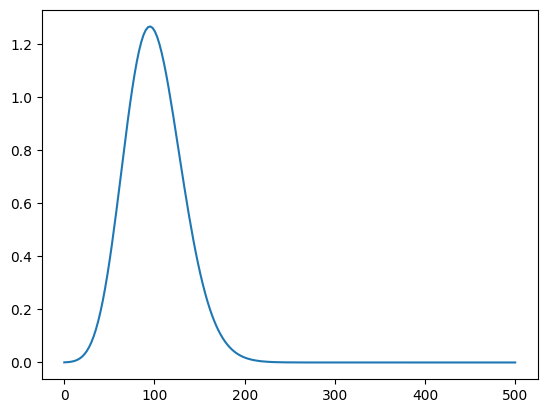

In [110]:
#x=np.linspace(0,500,200)
#plt.plot(x,Par_Poisson(x,10,10,10))